hi


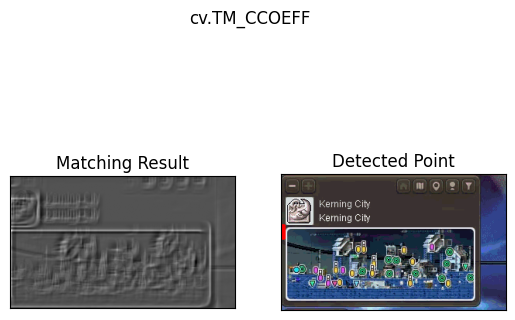

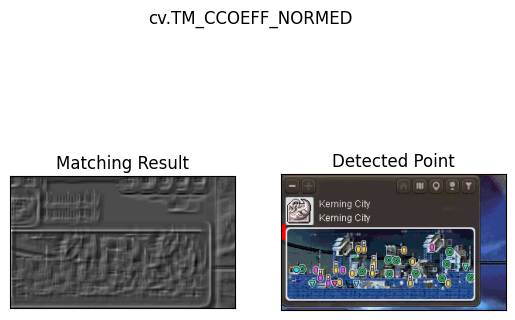

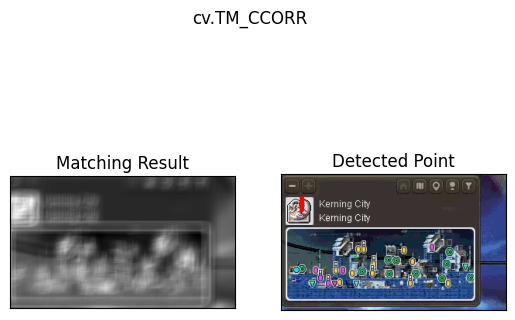

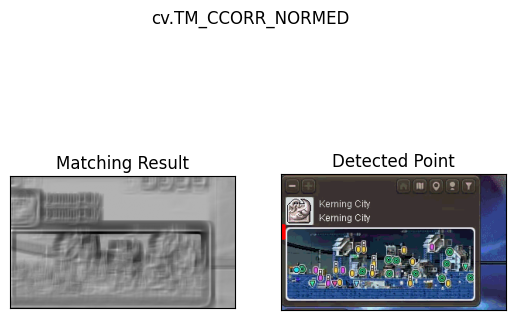

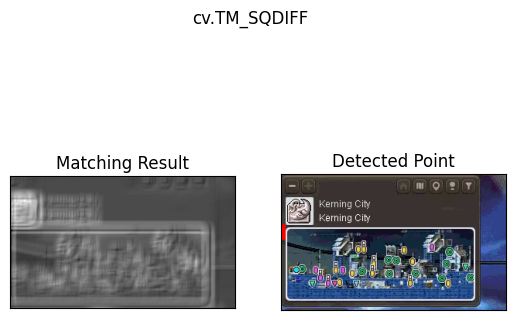

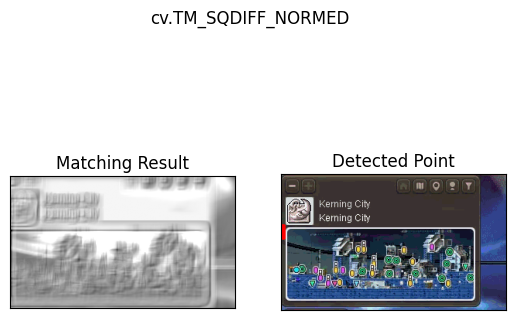

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def main():
    img = cv.imread('../pictures/images/kerning_city.png')
    assert img is not None, "file could not be read, check with os.path.exists()"
    img2 = img.copy()
    # template = cv.imread('../pictures/templates/icons/player.png')
    template = cv.imread('../pictures/templates/borders/kerning_city_maponly_topleft.png')
    assert template is not None, "file could not be read, check with os.path.exists()"
    w, h, _ = template.shape[::-1]
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()

if __name__ == '__main__':
    print('hi')
    main()
    

